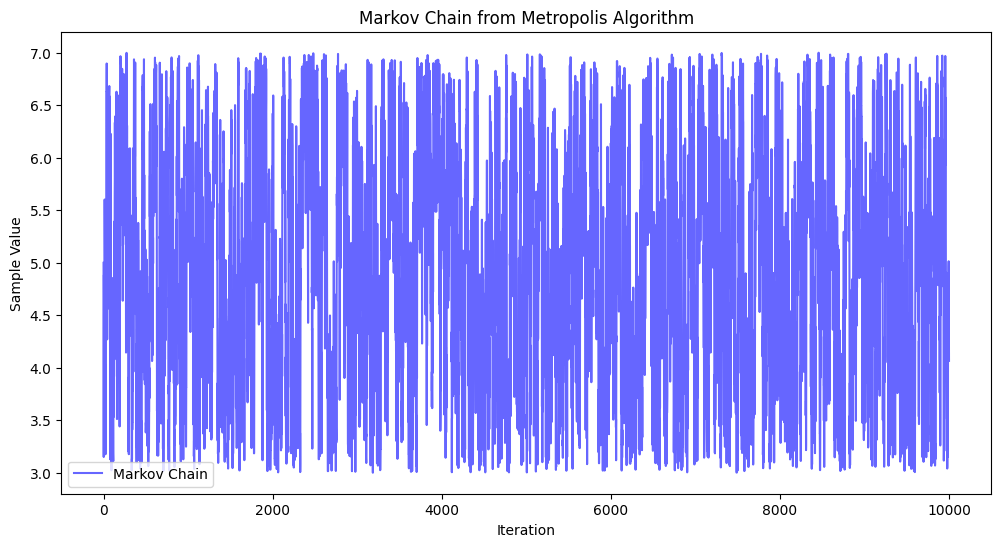

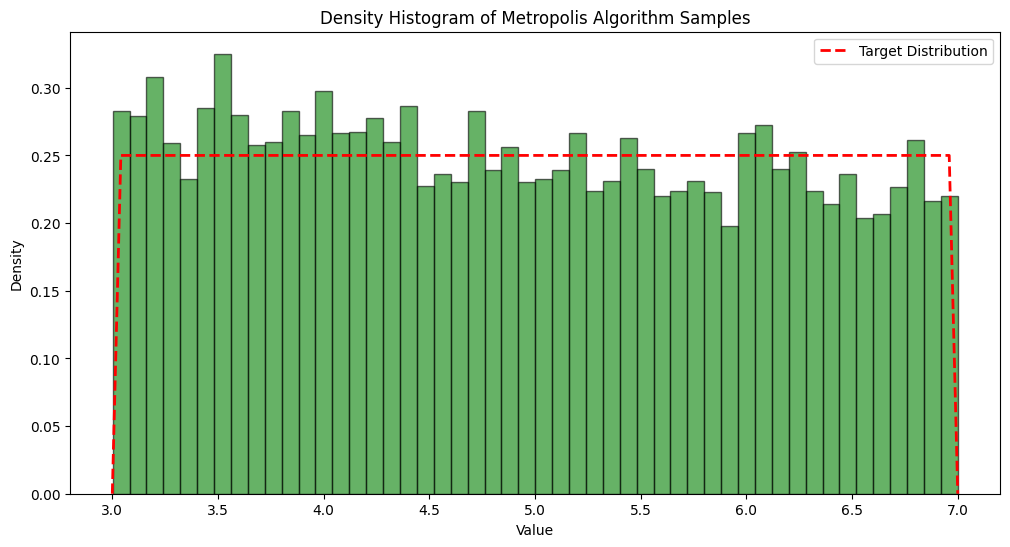

In [3]:
# using proposal distribution is uniform
import numpy as np
import matplotlib.pyplot as plt

# Define the target density function
def target_density(x):
    if 3 < x < 7:
        return 1 / (7 - 3)
    else:
        return 0

# Metropolis algorithm
def metropolis_algorithm(num_samples, initial_value, proposal_width):
    samples = np.zeros(num_samples)
    samples[0] = initial_value
    for i in range(1, num_samples):
        current_sample = samples[i - 1]
        proposed_sample = current_sample + np.random.uniform(-proposal_width, proposal_width)
        acceptance_ratio = target_density(proposed_sample) / target_density(current_sample)
        if acceptance_ratio >= 1 or np.random.rand() < acceptance_ratio:
            samples[i] = proposed_sample
        else:
            samples[i] = current_sample
    return samples

# Parameters for the Metropolis algorithm
num_samples = 10000
initial_value = 5.0  # Starting point
proposal_width = 1.0  # Width of the proposal distribution

# Generate samples
samples = metropolis_algorithm(num_samples, initial_value, proposal_width)

# Plot the Markov Chain
plt.figure(figsize=(12, 6))
plt.plot(samples, alpha=0.6, color='b', label='Markov Chain')
plt.title('Markov Chain from Metropolis Algorithm')
plt.xlabel('Iteration')
plt.ylabel('Sample Value')
plt.legend()
plt.show()

# Plot the density histogram
plt.figure(figsize=(12, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', edgecolor='black')

# Plot the target distribution
x = np.linspace(3, 7, 100)
target_pdf = [target_density(xi) for xi in x]
plt.plot(x, target_pdf, 'r--', linewidth=2, label='Target Distribution')

# Add titles and labels
plt.title('Density Histogram of Metropolis Algorithm Samples')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


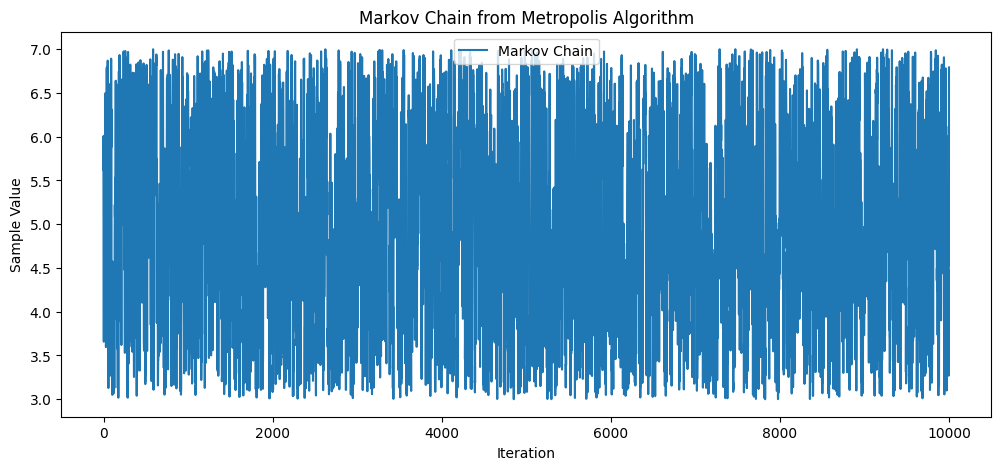

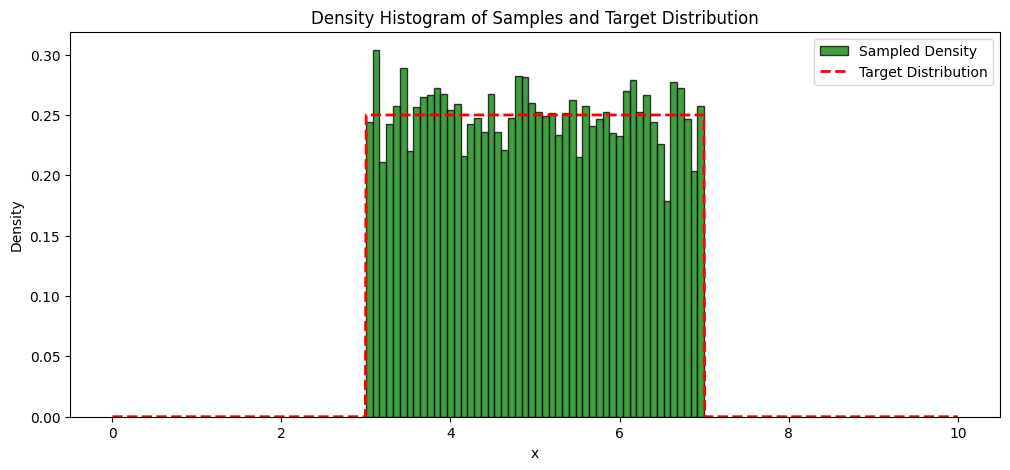

In [3]:
# Proposal distribution is normal

import numpy as np
import matplotlib.pyplot as plt

# Define the target density function
def target_density(x):
    if 3 <= x <= 7:
        return 1.0/(7-3)
    else:
        return 0.0

# Proposal distribution (e.g., Gaussian proposal with mean x and standard deviation 1)
def proposal_distribution(x):
    return np.random.normal(x, 1)

# Metropolis algorithm
def metropolis_algorithm(initial_state, target_density, proposal_distribution, iterations):
    x = initial_state
    samples = []
    
    for i in range(iterations):
        x_new = proposal_distribution(x)
        acceptance_ratio = target_density(x_new) / target_density(x)
        
        # Handle the case when target_density(x) is zero
        acceptance_ratio = min(1, acceptance_ratio) if target_density(x) != 0 else 1
        
        u = np.random.uniform(0, 1)
        
        if u < acceptance_ratio:
            x = x_new
        
        samples.append(x)
    
    return samples

# Running the Metropolis algorithm
initial_state = 5  # Start within the range of the uniform distribution
iterations = 10000
samples = metropolis_algorithm(initial_state, target_density, proposal_distribution, iterations)

# Plotting the Markov Chain
plt.figure(figsize=(12, 5))
plt.plot(samples, label='Markov Chain')
plt.title('Markov Chain from Metropolis Algorithm')
plt.xlabel('Iteration')
plt.ylabel('Sample Value')
plt.legend()
plt.show()

# Create a density histogram of the sampled numbers
plt.figure(figsize=(12, 5))
plt.hist(samples, bins=50, density=True, alpha=0.75, label='Sampled Density' ,color='g', edgecolor='black')

# Plot the target uniform distribution
x = np.linspace(0, 10, 1000)
y = np.array([target_density(xi) for xi in x])
plt.plot(x, y,'r--', label='Target Distribution', linewidth=2,)

plt.title('Density Histogram of Samples and Target Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()
